# Ciência de Dados - Lista 1

Aluno: Nilson Sales de Carvalho




#### 4. Crie um conjunto de dados com duas variáveis V1 e V2, tal que:
- Mediana de V1 < Média de V1 (0,5 ponto)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x1 = np.random.normal(0,1,500)
x2 = np.random.normal(-1,0.5,500)

v1 = np.concatenate((x1,x2))

print("Mean = ", np.mean(v1))
print("Median = ", np.median(v1))

Mean =  -0.475465356012151
Median =  -0.6278641298405099


- Mediana de V2 > Média de V2 (0,5 ponto)

In [ ]:
x1 = np.random.normal(0,1,500)
x2 = np.random.normal(1,0.5,500)

v2 = np.concatenate((x1,x2))

print("Mean = ", np.mean(v2))
print("Median = ", np.median(v2))

Mean =  0.5432849210739729
Median =  0.6972180547227772



#### 5. Baseando-se no conjunto de dados criado na questão 4, crie uma função em Python que:
- Mostra o histograma de cada variável; (1 ponto)


In [ ]:
def plot_hist(v1, v2, label1=None, label2=None):
  n, bins, ignored = plt.hist(v1, 50, density=True, alpha=0.6, label=label1)
  n, bins, ignored = plt.hist(v2, 50, density=True, alpha=0.6, label=label2)
  plt.title("Histogram")
  plt.legend(loc='upper right')
  plt.show()


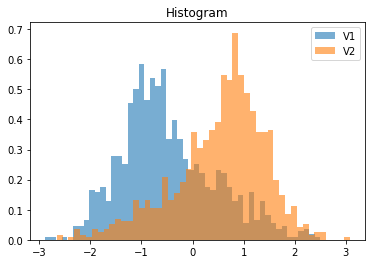

In [ ]:
plot_hist(v1, v2, "V1", "V2")

- Verifica se as variáveis seguem uma distribuição Normal (use teste
de hipótese) (1 ponto)


In [ ]:
# Q-Q plot
from scipy.stats import normaltest
import scipy.stats as stats

def test_normal(x, qq_plot=False):
  if x.size < 30:
    print("Sample size too small")
    return False

  alpha = 0.05  # significância, para 95% de confiança
  stat_test, p_value = normaltest(x)

  print("p-value = ", p_value)

  if (qq_plot==True):
    from statsmodels.graphics.gofplots import qqplot
    qqplot_data = qqplot( x , line ='s').gca().lines
    plt.show()

  if (p_value <= alpha):
    print("Not normal")
    return False
  else:
    print("Normal distribution")
    return True


p-value =  1.5398897916379827e-11


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


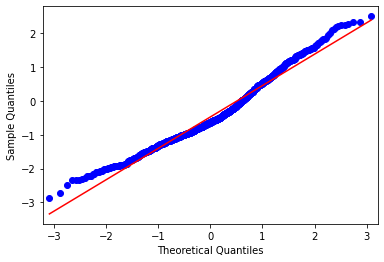

Not normal


False

In [ ]:
test_normal(v1, qq_plot=True)

p-value =  4.072032741678674e-18


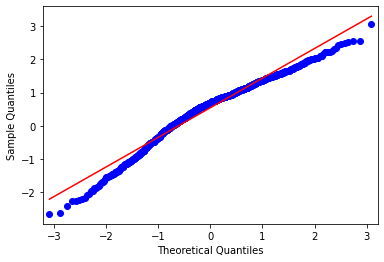

Not normal


False

In [ ]:
test_normal(v2, qq_plot=True)

#### 10.Crie um script em Python que avalie a diferença de desempenho do classificador K-NN para o conjunto de dados Iris (https://archive.ics.uci.edu/ml/datasets/iris). Use F-measure e K-fold cross-validation. (2 pontos)


In [ ]:
import pandas as pd

data = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(data, names=names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Separating attributes (X) and labels (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
# Building our model and using K-Fold Cross Validation to evaluate it
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)

kf = KFold(n_splits=4, shuffle=True)
scores = cross_val_score(knn, X, y, cv=kf, scoring='f1_micro')

print(scores)
print("Average F1 score: ", np.mean(scores))

[0.89473684 0.97368421 0.97297297 1.        ]
Average F1 score:  0.960348506401138
